In [1]:
import random
import random
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

# RanFor

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female\GeneCpG\Xtras\Top50_eachFeats
female = pd.read_csv("All5_Top50sCpG_Female.csv")
female = female.drop(['PATNO'], axis=1)
print(female.shape)
female.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female\GeneCpG\Xtras\Top50_eachFeats
(150, 229)


,APPRDX,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
0,1,0.045694,0.924158,0.908038,0.033501,0.07147,0.904030,0.917645,0.830685,0.506640,...,0.027095,0.939462,0.767832,0.845091,0.156538,0.510861,0.922070,0.877443,0.792984,0.895246
1,1,0.050506,0.929821,0.928079,0.032749,0.06974,0.914086,0.889673,0.768925,0.535331,...,0.018183,0.939685,0.778352,0.820209,0.150134,0.622603,0.929889,0.778461,0.763160,0.887588


In [3]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = female.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7833333333333333
2
Mean accuracy: 0.8333333333333334
3
Mean accuracy: 0.8166666666666667
4
Mean accuracy: 0.7166666666666666
5
Mean accuracy: 0.8
6
Mean accuracy: 0.8
7
Mean accuracy: 0.7166666666666667
8
Mean accuracy: 0.7833333333333333
9
Mean accuracy: 0.85
10
Mean accuracy: 0.85
11
Mean accuracy: 0.8333333333333333
12
Mean accuracy: 0.7166666666666667
13
Mean accuracy: 0.8166666666666668
14
Mean accuracy: 0.8166666666666668
15
Mean accuracy: 0.7833333333333333
16
Mean accuracy: 0.75
17
Mean accuracy: 0.8166666666666668
18
Mean accuracy: 0.8166666666666668
19
Mean accuracy: 0.7499999999999999
20
Mean accuracy: 0.75
21
Mean accuracy: 0.8
22
Mean accuracy: 0.7666666666666667
23
Mean accuracy: 0.85
24
Mean accuracy: 0.8166666666666668
25
Mean accuracy: 0.7833333333333333
26
Mean accuracy: 0.7833333333333333
27
Mean accuracy: 0.8166666666666668
28
Mean accuracy: 0.75
29
Mean accuracy: 0.7
30
Mean accuracy: 0.7500000000000001
31
Mean accuracy: 0.7166666666666668
32
Mea

In [4]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("All5_Top50sCpG_Female_100RF.csv", index = False)

0.7851666666666667


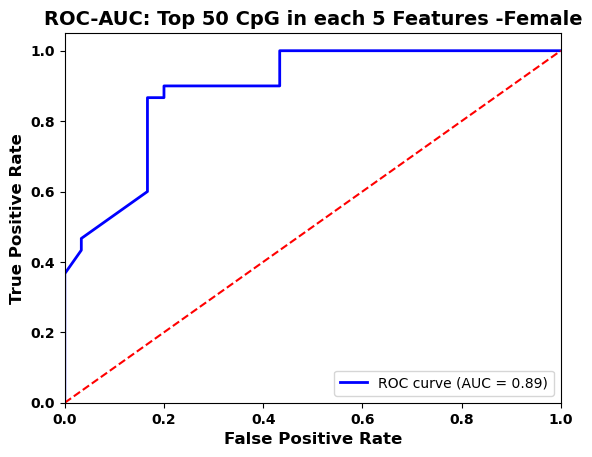

In [5]:
dataset = female.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(tpr,fpr)

# Plot the ROC curve
plt.plot(tpr,fpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Top 50 CpG in each 5 Features -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All5_Top50sCpG_Female.svg')
plt.savefig('ROC_AUC_All5_Top50sCpG_Female.pdf')
plt.show()
